In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_price_data=pd.read_csv('/content/gold_price_data.csv')

In [3]:
gold_price_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_price_data.shape

(2290, 6)

In [5]:
gold_price_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_price_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#getting some info
gold_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation

In [10]:
correlation=gold_price_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-10-2c9c84c82b10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_price_data.corr()


<Axes: >

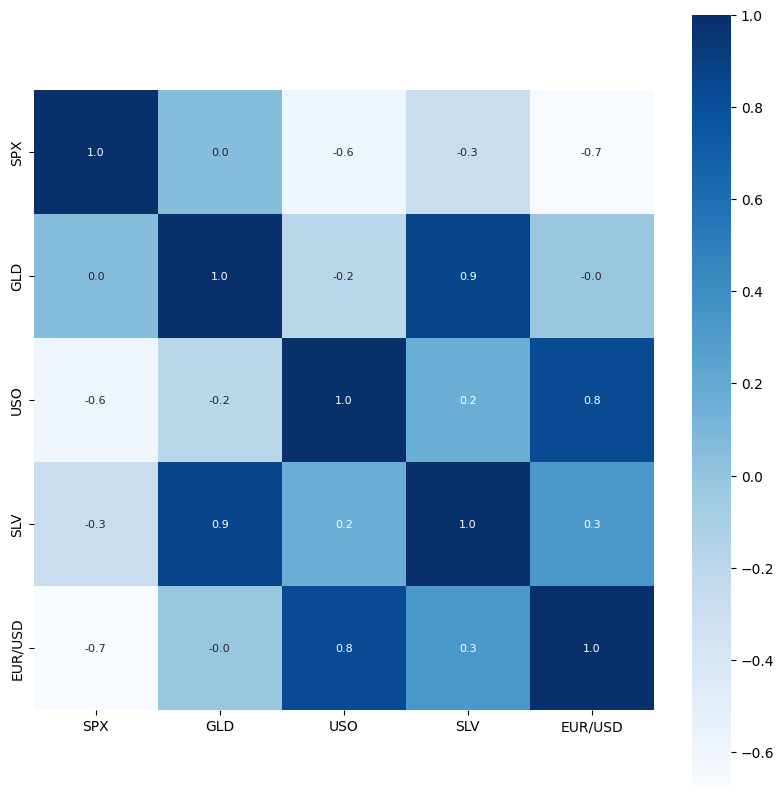

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


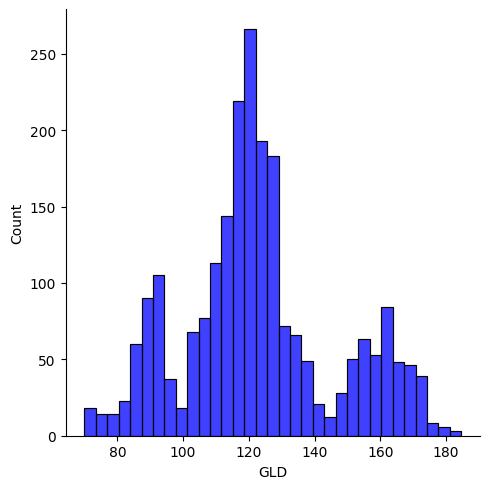

In [20]:
#checking the distribution of gold price
sns.displot(gold_price_data['GLD'],color='Blue')

spltting the data and target

In [21]:
x=gold_price_data.drop(['Date','GLD'],axis=1)
y=gold_price_data['GLD']

In [22]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


training and testing data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


model training

RandomForest Regressor

In [26]:
regressor =RandomForestRegressor(n_estimators=100)

In [28]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

model evaluation

In [29]:
#evaluation on test data
test_data_predict=regressor.predict(x_test)

In [30]:
print(test_data_predict)

[168.42939943  81.98139966 116.0451997  127.69210055 120.77420132
 154.72749783 149.93979838 126.14290079 117.59319869 125.88200141
 116.91760127 171.34220079 141.20519811 167.79459866 115.29230016
 117.50180011 139.02600405 169.78330068 159.45710302 158.34920031
 155.18919987 125.32820003 175.46009975 157.2082033  125.18800046
  93.7515995   77.94829995 120.80340019 119.04819907 167.52789997
  88.41260062 125.23300029  91.25850085 117.54640046 120.97629954
 136.61950129 115.52170128 115.52300056 147.06149953 107.16970083
 104.71780255  87.36189826 126.5938005  117.84399982 153.96899905
 119.68050005 108.40359945 107.98289867  93.16460069 126.97669836
  74.80890078 113.72349944 121.25980031 111.19339915 118.85559933
 120.79709943 158.75050028 167.46060135 146.91029678  85.90919884
  94.46920016  86.76589913  90.62660015 118.8240009  126.4462005
 127.58819958 168.68560022 122.38029929 117.26409882  98.66950047
 168.02079996 143.05709799 131.90930287 121.21350222 120.8536995
 119.7805005

In [32]:
#R square error
error_scored=metrics.r2_score(y_test,test_data_predict)
print(error_scored)

0.9894165226029028


In [33]:
#compare actual values and predict values
y_test=list(y_test)

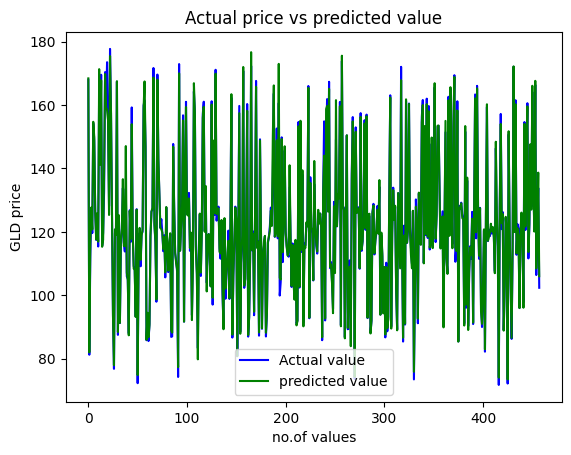

In [35]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_predict,color='green',label='predicted value')
plt.title('Actual price vs predicted value')
plt.xlabel('no.of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()